This notebook contains the live demo shown in the meetup talk. Each cell adds an element to the chart. The new content per cell is highlighted by comments.

In [1]:
import altair as alt
from vega_datasets import data

In [36]:
# load data
df = data.gapminder()

# assign region labels
df['region'] = df['cluster'].map({
    0: 'Indian Subcontinent',
    1: 'Europe',
    2: 'Africa',
    3: 'Americas',
    4: 'Asia/Pacific',
    5: 'Middle East',
})

df['pop'] = (df['pop'] / 1.e6).round()

In [37]:
df.head()

,year,country,cluster,pop,life_expect,fertility,region
0,1955,Afghanistan,0,9.0,30.332,7.7,Indian Subcontinent
1,1960,Afghanistan,0,10.0,31.997,7.7,Indian Subcontinent
2,1965,Afghanistan,0,11.0,34.020,7.7,Indian Subcontinent
3,1970,Afghanistan,0,12.0,36.088,7.7,Indian Subcontinent
4,1975,Afghanistan,0,14.0,38.438,7.7,Indian Subcontinent


In [38]:
df.tail()

,year,country,cluster,pop,life_expect,fertility,region
688,1985,Venezuela,3,17.0,70.190,3.6485,Americas
689,1990,Venezuela,3,19.0,71.150,3.2500,Americas
690,1995,Venezuela,3,22.0,72.146,2.9415,Americas
691,2000,Venezuela,3,24.0,72.766,2.7230,Americas
692,2005,Venezuela,3,25.0,73.747,2.5470,Americas


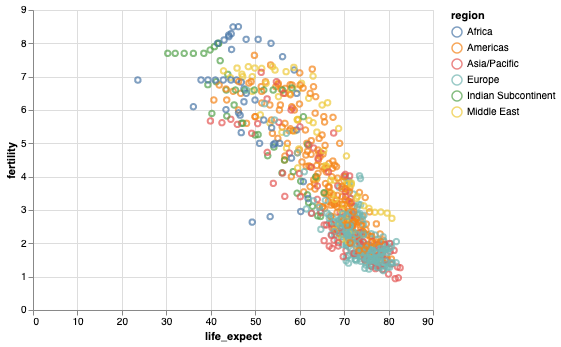

In [39]:
# base chart
chart = alt.Chart(
    df
).mark_point(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N'
)

chart.display()

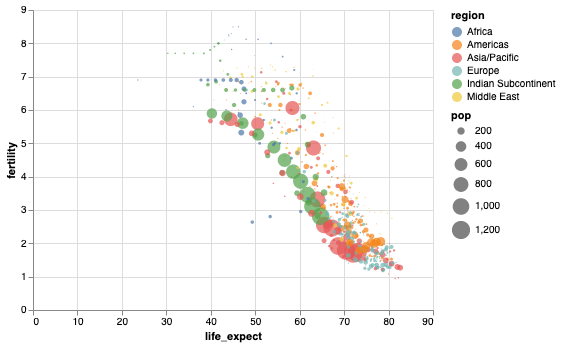

In [40]:
chart = alt.Chart(
    df
).mark_circle(  # circles instead of points
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size='pop'  # population maps to circle size
)

chart.display()

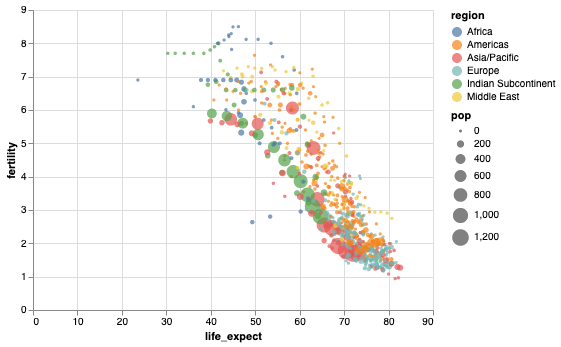

In [41]:
# this shows how to tweak properties of encodings

chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300]))   # change point scale to better show very small countries
)

chart.display()

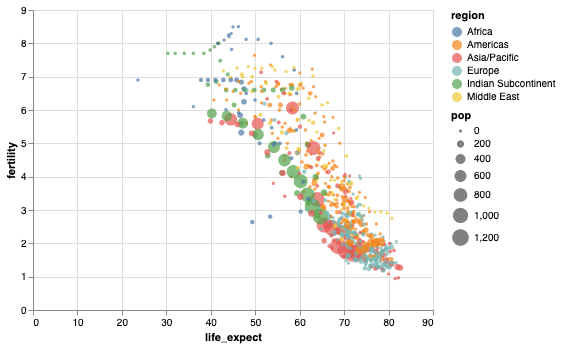

In [51]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300]))
).interactive()  # enable pan/zoom

chart.display()

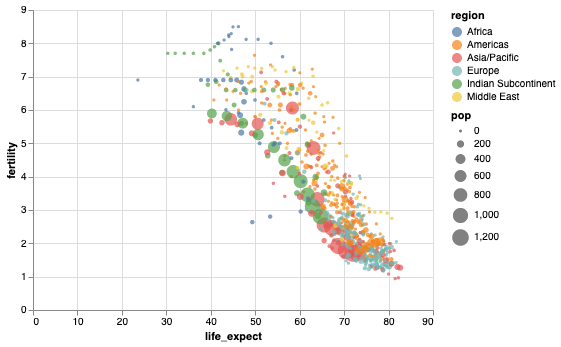

In [42]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']  # add a tooltip
)

chart.display()

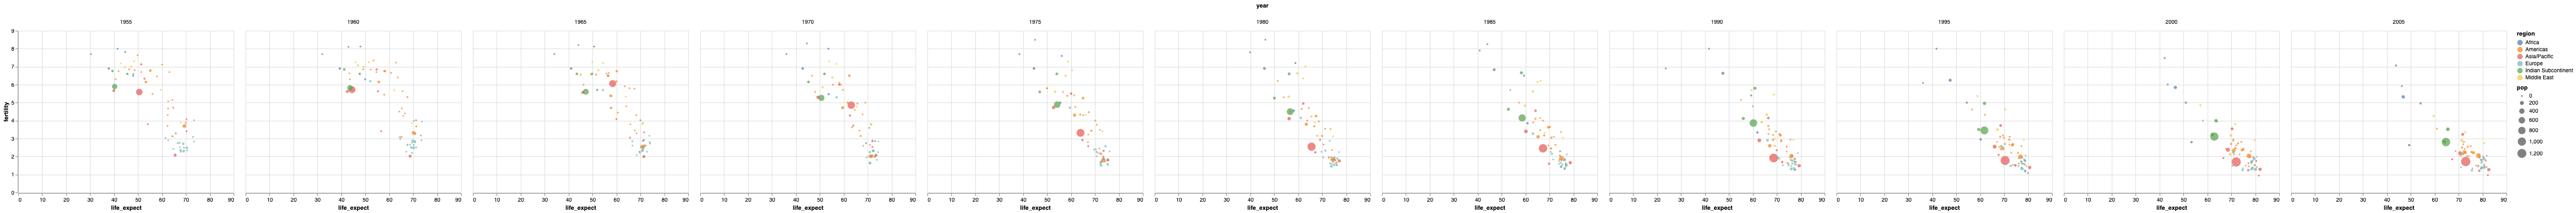

In [54]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year'],
    column='year',  # facet by year
)

chart.display()

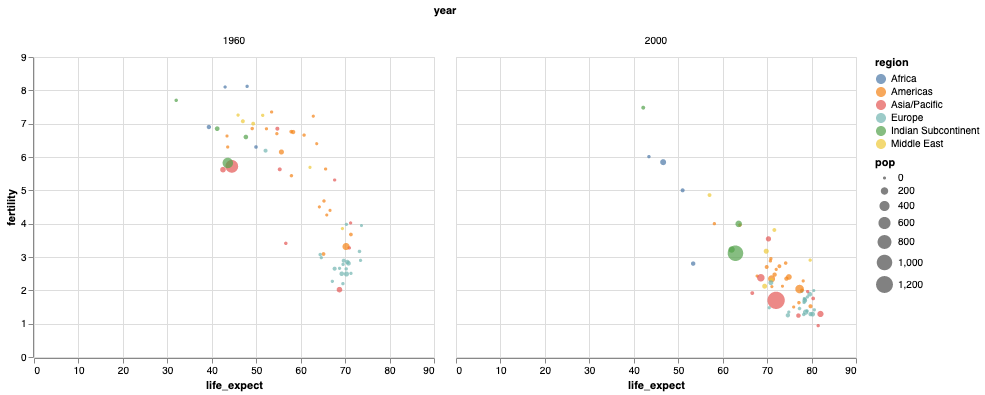

In [44]:
chart = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year'],
    column='year'  # facet by year
).transform_filter(
    (alt.datum.year == 1960) | (alt.datum.year == 2000)  # filter for two years only
)

chart.display()

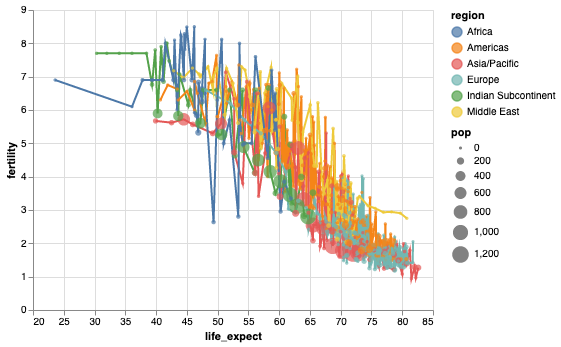

In [47]:
# go back to chart without faceting, try to show countries' trajectories as lines

circles = alt.Chart(  # assign circles layer to a variable
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
)

lines = alt.Chart(  # draw lines, same encoding as above
    df
).mark_line(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
)

(lines + circles).display()  # layer the two charts

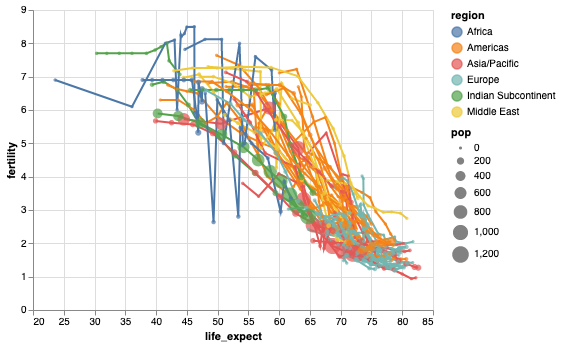

In [71]:
# In the above plot, a line is shown for each region, for all its countries.
# That's not what we want. The 'detail' channel enables grouping by a field, without a visual representation of the field.

circles = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
)

lines = alt.Chart(
    df
).mark_line(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    detail='country'  # detail on (split lines by) country
)

(lines + circles).display()

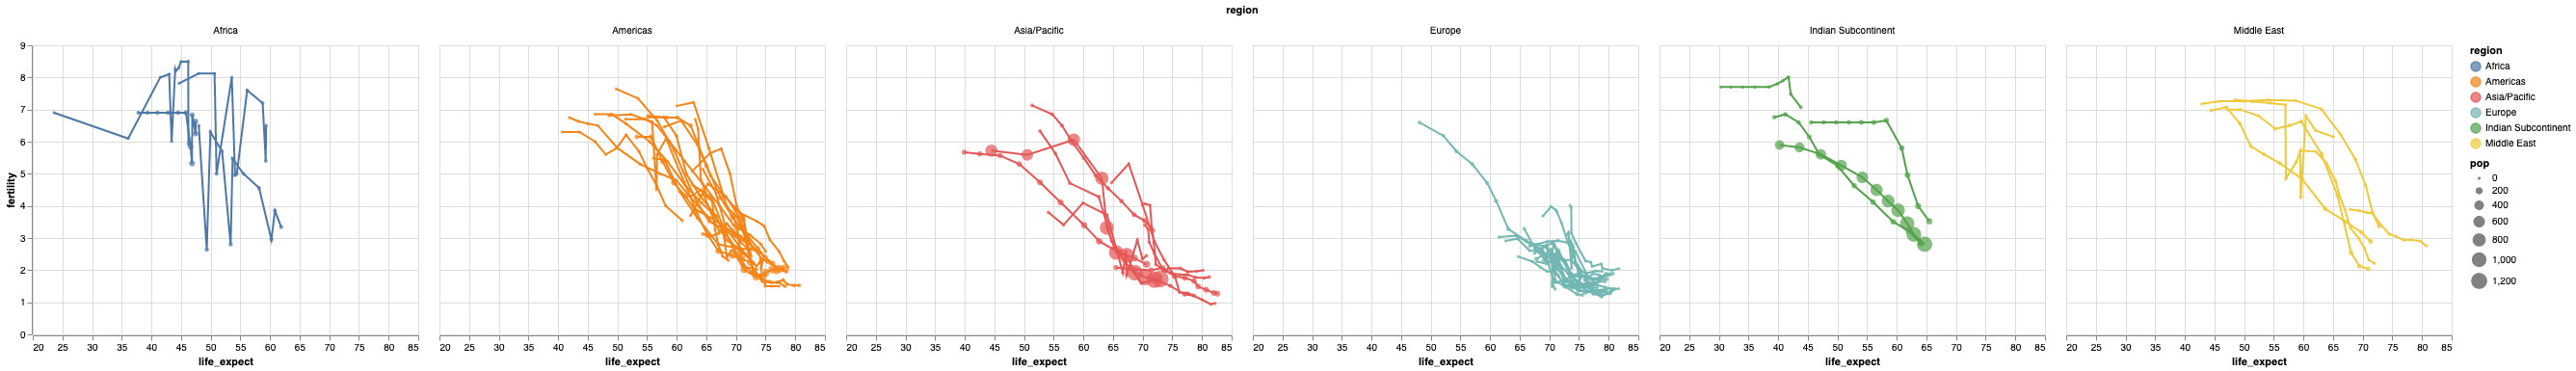

In [73]:
# faceting a layered chart is a bit tricky!

circles = alt.Chart().mark_circle(  # don't specify data per layer
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
)

lines = alt.Chart().mark_line(   # don't specify data per layer
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    detail='country:N',
)

alt.layer(lines, circles).facet('region:N', data=df).display()  # stick in data when faceting

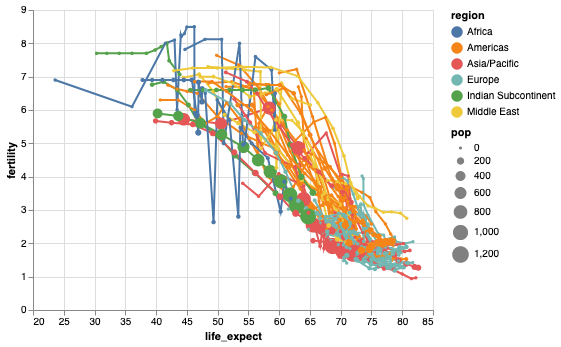

In [93]:
# go back to version without faceting, add interactive selection to show trajectories
# (code duplication could be greatly reduced by defining a base chart with common attributes)

sel = alt.selection(type='single', fields=['country'])  # define a single selection

circles = alt.Chart(
    df
).mark_circle(
).encode(
    x='life_expect',
    y='fertility',
    color=alt.condition(sel, 'region:N', alt.value("grey")),  # condition the color on the selection
    opacity=alt.condition(sel, alt.value(1), alt.value(0.15)),  # condition the opacity on the selection
    size=alt.Size('pop', scale=alt.Scale(range=[10, 300])),
    tooltip=['country', 'region', 'pop', 'fertility', 'life_expect', 'year']
).add_selection(sel)

lines = alt.Chart(
    df
).mark_line(
).encode(
    x='life_expect',
    y='fertility',
    color=alt.condition(sel, 'region:N', alt.value("grey")),  # same line as above
    opacity=alt.condition(sel, alt.value(1), alt.value(0.2)),  # same line as above
    detail='country'
)

(lines + circles).display()

In [92]:
# save an html version of that chart
(lines + circles).save('output/interactive_live_demo.html')